<a href="https://colab.research.google.com/github/LeandroCoelhos/estudos_datascience/blob/main/Limpeza_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

# DataFrame original com as colunas
df = pd.DataFrame({
    'ID': np.arange(1, 1001),
    'Idade': np.random.randint(18, 66, 1000),
    'Categoria': np.random.choice(['A', 'B', 'C', 'D'], 1000),
    'Renda': np.random.uniform(1000, 5000, 1000)
})

# Adicionar valores numéricos como strings e letras em algumas linhas
df.loc[3, 'Idade'] = 'Vinte'
df.loc[7, 'Categoria'] = 'E'
df.loc[15, 'Renda'] = 'Baixa'

# Exibir o DataFrame resultante
print(df)

       ID  Idade Categoria        Renda
0       1     58         C  3011.113927
1       2     35         B   4906.39912
2       3     21         C   2801.97874
3       4  Vinte         C  1040.937841
4       5     46         D  4242.037797
..    ...    ...       ...          ...
995   996     37         C  1117.194857
996   997     30         C  4508.146947
997   998     51         B  2298.667923
998   999     51         A  4119.015128
999  1000     18         D  4467.367747

[1000 rows x 4 columns]


In [ ]:
pd.get_dummies(df, columns=['Categoria'])

,ID,Idade,Renda,Categoria_A,Categoria_B,Categoria_C,Categoria_D,Categoria_E
0,1,18,3579.865033,1,0,0,0,0
1,2,24,2990.420575,0,1,0,0,0
2,3,54,4395.853217,0,0,1,0,0
3,4,Vinte,1665.486436,0,0,0,1,0
4,5,25,2767.664076,0,0,0,1,0
...,...,...,...,...,...,...,...,...
995,996,18,3794.446505,0,1,0,0,0
996,997,21,2946.329818,1,0,0,0,0
997,998,26,4879.995805,0,1,0,0,0
998,999,38,2173.345363,0,0,0,1,0


In [ ]:
df['Idade'] = pd.to_numeric(df['Idade'], errors='coerce')

In [ ]:
df = df.fillna(df.mean())
df

<ipython-input-4-f383654e7baf>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.mean())


,ID,Idade,Categoria,Renda
0,1,18.000000,A,3579.865033
1,2,24.000000,B,2990.420575
2,3,54.000000,C,4395.853217
3,4,41.823824,D,1665.486436
4,5,25.000000,D,2767.664076
...,...,...,...,...
995,996,18.000000,B,3794.446505
996,997,21.000000,A,2946.329818
997,998,26.000000,B,4879.995805
998,999,38.000000,D,2173.345363


In [ ]:
df['app'] = np.where(df['Renda'] == 2000, 1, 0)
df

,ID,Idade,Categoria,Renda,app
0,1,18.000000,A,3579.865033,0
1,2,24.000000,B,2990.420575,0
2,3,54.000000,C,4395.853217,0
3,4,41.823824,D,1665.486436,0
4,5,25.000000,D,2767.664076,0
...,...,...,...,...,...
995,996,18.000000,B,3794.446505,0
996,997,21.000000,A,2946.329818,0
997,998,26.000000,B,4879.995805,0
998,999,38.000000,D,2173.345363,0


In [ ]:
df['Uniforme'] = np.random.uniform(0, 1, size=len(df))
df['Normal'] = np.random.normal(loc=0, scale=1, size=len(df))
df['Exponencial'] = np.random.exponential(scale=1, size=len(df))
df

,ID,Idade,Categoria,Renda,app,Uniforme,Normal,Exponencial
0,1,18.000000,A,3579.865033,0,0.469726,-0.725227,0.239126
1,2,24.000000,B,2990.420575,0,0.819561,-0.009626,0.792268
2,3,54.000000,C,4395.853217,0,0.352458,-0.895339,0.179595
3,4,41.823824,D,1665.486436,0,0.207396,-0.679053,0.748704
4,5,25.000000,D,2767.664076,0,0.269753,-1.206079,1.733107
...,...,...,...,...,...,...,...,...
995,996,18.000000,B,3794.446505,0,0.125669,0.089979,1.127098
996,997,21.000000,A,2946.329818,0,0.855498,0.037798,0.281958
997,998,26.000000,B,4879.995805,0,0.840773,0.509895,0.413771
998,999,38.000000,D,2173.345363,0,0.787372,0.021523,0.271616


# Hierarquico


In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Criar um conjunto de dados de exemplo
X, y = make_blobs(n_samples=100, centers=3, random_state=42)

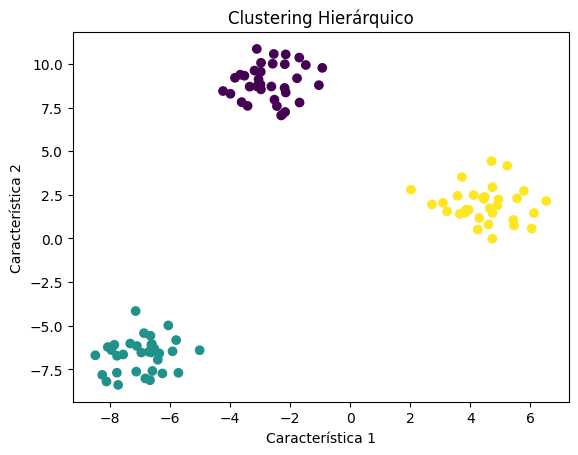

In [ ]:
n_clusters = 3
# Criar uma instância do algoritmo de clustering hierárquico
clustering = AgglomerativeClustering(n_clusters=n_clusters)

# Realizar o clustering nos dados
labels = clustering.fit_predict(X)

# Plotar os resultados
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.title("Clustering Hierárquico")
plt.xlabel("Característica 1")
plt.ylabel("Característica 2")
plt.show()

# Exemplo mais real

In [ ]:
import numpy as np
import pandas as pd

np.random.seed(0)

# Tamanho dos conjuntos de dados
tamanho_5000 = 5000
tamanho_1000 = 1000

# Colunas dos conjuntos de dados
colunas = ['ID', 'Idade', 'Categoria', 'Renda', 'Limite_Cartao']

# Criação dos dados para o conjunto de tamanho 5000
dados_5000 = {
    'ID': np.arange(tamanho_5000),
    'Idade': np.random.randint(18, 65, tamanho_5000),
    'Categoria': np.random.choice(['A', 'B', 'C', 'D', 'E', 'F', 'G'], tamanho_5000),
    'Renda': np.random.normal(5000, 1000, tamanho_5000),
    'Limite_Cartao': np.random.normal(10000, 2000, tamanho_5000)
}

# Criação dos dados para o conjunto de tamanho 1000
dados_1000 = {
    'ID': np.arange(tamanho_1000),
    'Idade': np.random.randint(18, 65, tamanho_1000),
    'Categoria': np.random.choice(['A', 'B', 'C', 'D', 'E', 'F', 'G'], tamanho_1000),
    'Renda': np.random.normal(5000, 1000, tamanho_1000),
    'Limite_Cartao': np.random.normal(10000, 2000, tamanho_1000)
}

# Adição de outliers
porcentagem_outliers = np.random.uniform(0.05, 0.1)
num_outliers = int(porcentagem_outliers * tamanho_5000)

outliers_id = np.random.choice(tamanho_5000, num_outliers, replace=False)
outliers_renda = np.random.uniform(2000, 15000, num_outliers)
outliers_limite_cartao = np.random.uniform(5000, 25000, num_outliers)

dados_5000['Renda'][outliers_id] = outliers_renda
dados_5000['Limite_Cartao'][outliers_id] = outliers_limite_cartao

# Criação dos dataframes
df_treino = pd.DataFrame(dados_5000, columns=colunas)
df_teste = pd.DataFrame(dados_1000, columns=colunas)

# Pre Pross

## Remoção de outliers

In [ ]:
def clip_quantiles_treino(df_treino, colunas_numericas, quantiles):
    df = df_treino.copy()
    clip_values = {}

    for coluna in colunas_numericas:
        quantil_min = df[coluna].quantile(quantiles[coluna][0])
        quantil_max = df[coluna].quantile(quantiles[coluna][1])

        df[coluna] = df[coluna].clip(quantil_min, quantil_max)
        clip_values[coluna] = (quantil_min, quantil_max)

    return df, clip_values

def clip_quantiles_teste(df_teste, colunas_numericas, clip_values):
    df = df_teste.copy()
    for coluna in colunas_numericas:
        quantil_min, quantil_max = clip_values[coluna]
        df[coluna] = df[coluna].clip(quantil_min, quantil_max)

    return df

In [ ]:
# Definir colunas numéricas e quantis desejados
colunas_numericas = ['Idade', 'Renda', 'Limite_Cartao']
quantiles = {
    'Idade': (0.1, 0.9),
    'Renda': (0.05, 0.95),
    'Limite_Cartao': (0.01, 0.99)
}

# Aplicar o recorte no conjunto de treinamento
df_treino_clip, clip_values = clip_quantiles_treino(df_treino, colunas_numericas, quantiles)

# Aplicar o mesmo recorte no conjunto de teste
df_teste_clip = clip_quantiles_teste(df_teste, colunas_numericas, clip_values)

### Vizualizar BoxPlot

In [ ]:
import matplotlib.pyplot as plt

def boxplot_comparativo(df_antes, df_depois, colunas_numericas):
    fig, axs = plt.subplots(len(colunas_numericas), 2, figsize=(12, 8))

    for i, coluna in enumerate(colunas_numericas):
        # Boxplot do DataFrame antes da clipagem
        axs[i, 0].boxplot(df_antes[coluna])
        axs[i, 0].set_title(f'Antes - {coluna}')

        # Boxplot do DataFrame depois da clipagem
        axs[i, 1].boxplot(df_depois[coluna])
        axs[i, 1].set_title(f'Depois - {coluna}')

    # Ajustar layout
    plt.tight_layout()
    plt.show()

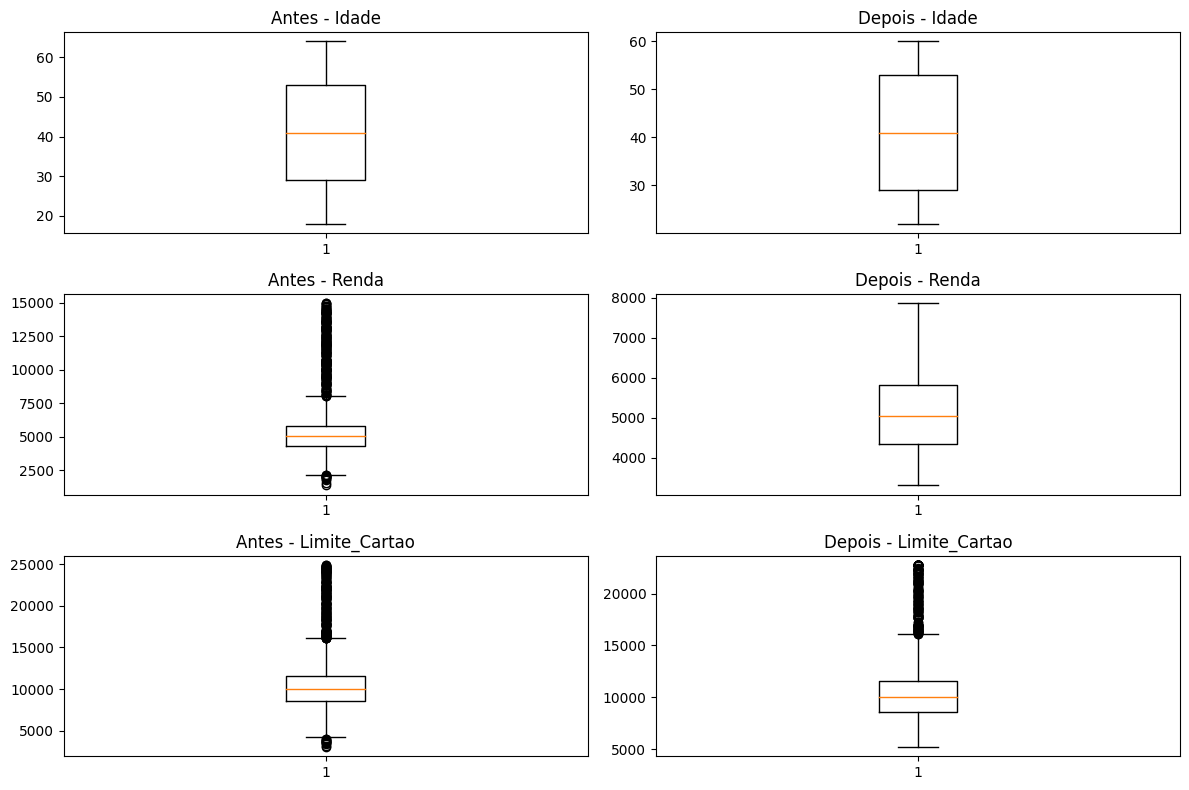

In [ ]:
# Definir colunas numéricas
colunas_numericas = ['Idade', 'Renda', 'Limite_Cartao']

# Chamar a função para criar o boxplot comparativo
boxplot_comparativo(df_treino, df_treino_clip, colunas_numericas)

## One Hot encod

In [ ]:
from sklearn.preprocessing import OneHotEncoder

def aplicar_dummy_treino(df_treino, colunas_dummy):
    df = df_treino.copy()
    # Criação do codificador Dummy
    encoder = OneHotEncoder()

    # Ajusta o codificador Dummy com base nas categorias do conjunto de treinamento
    encoder.fit(df[colunas_dummy])

    # Aplica o codificador Dummy no conjunto de treinamento
    dummy_treino = encoder.transform(df[colunas_dummy]).toarray()

    # Cria um novo DataFrame com as colunas dummy
    df_dummy_treino = pd.DataFrame(dummy_treino, columns=encoder.get_feature_names_out(colunas_dummy))

    # Remove as colunas originais do conjunto de treinamento
    df_treino_encoded = df.drop(colunas_dummy, axis=1)

    # Concatena o DataFrame dummy com o conjunto de treinamento codificado
    df_treino_encoded = pd.concat([df_treino_encoded, df_dummy_treino], axis=1)

    return df_treino_encoded, encoder

def aplicar_dummy_teste(df_teste, colunas_dummy, encoder):
    df = df_teste.copy()
    # Aplica o codificador Dummy no conjunto de teste
    dummy_teste = encoder.transform(df[colunas_dummy]).toarray()

    # Cria um novo DataFrame com as colunas dummy
    df_dummy_teste = pd.DataFrame(dummy_teste, columns=encoder.get_feature_names_out(colunas_dummy))

    # Remove as colunas originais do conjunto de teste
    df_teste_encoded = df.drop(colunas_dummy, axis=1)

    # Concatena o DataFrame dummy com o conjunto de teste codificado
    df_teste_encoded = pd.concat([df_teste_encoded, df_dummy_teste], axis=1)

    return df_teste_encoded

In [ ]:
# Colunas dummy
colunas_dummy = ['Categoria']

# Aplicar o codificador Dummy no conjunto de treinamento
df_treino_encoded, encoder = aplicar_dummy_treino(df_treino_clip, colunas_dummy)

# Aplicar o mesmo codificador Dummy no conjunto de teste
df_teste_encoded = aplicar_dummy_teste(df_teste_clip, colunas_dummy, encoder)

In [ ]:
df_treino.shape, df_treino_clip.shape, df_treino_encoded.shape,

((5000, 5), (5000, 5), (5000, 11))

In [ ]:
df_treino_encoded.head()

,ID,Idade,Renda,Limite_Cartao,Categoria_A,Categoria_B,Categoria_C,Categoria_D,Categoria_E,Categoria_F,Categoria_G
0,0,60,3459.681499,9972.765390,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,22,7093.440496,8015.424497,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2,22,7323.681695,22766.676089,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,3,22,6288.499721,10706.121451,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,4,57,5009.273330,14578.438761,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_teste_encoded.describe()

,ID,Idade,Renda,Limite_Cartao,Categoria_A,Categoria_B,Categoria_C,Categoria_D,Categoria_E,Categoria_F,Categoria_G
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,41.22800,4976.222140,10133.306898,0.128000,0.141000,0.144000,0.147000,0.144000,0.156000,0.140000
std,288.819436,12.88876,953.891664,1932.794229,0.334257,0.348196,0.351265,0.354283,0.351265,0.363037,0.347161
min,0.000000,22.00000,3312.209918,5196.967225,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,249.750000,29.75000,4331.817543,8847.483767,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,499.500000,42.00000,4956.344791,10138.986327,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,749.250000,53.00000,5561.370926,11438.639567,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,999.000000,60.00000,7870.955377,16063.859355,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Aplicar Hierarquico

In [ ]:
X = df_treino_encoded[['Idade', 'Renda', 'Limite_Cartao', 'Categoria_A', 'Categoria_G']]
# Atribuir as colunas desejadas do df_teste_encoded ao X_teste
X_teste = df_teste_encoded[['Idade', 'Renda', 'Limite_Cartao', 'Categoria_A', 'Categoria_G']]

In [ ]:
from sklearn.cluster import AgglomerativeClustering

# Crie uma instância do modelo AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=3)

# Treine o modelo usando o conjunto de dados X
clustering.fit(X)

# Obtenha os rótulos dos clusters atribuídos a cada amostra
labels = clustering.labels_

# Silhueta

<ipython-input-6-d41853cc6266>:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color = plt.cm.get_cmap("Spectral")(i / n_clusters)


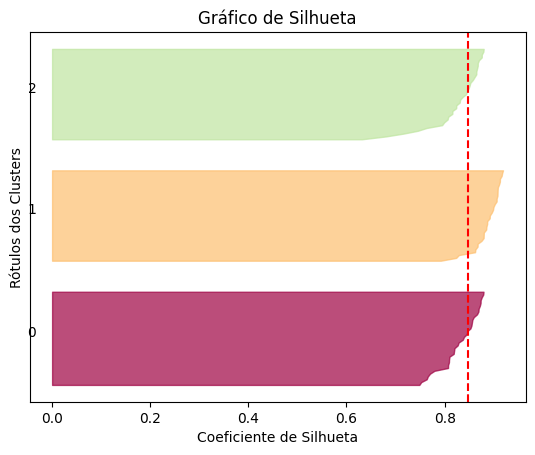

In [ ]:
# Calcular o coeficiente de silhueta para cada amostra
silhouette_avg = silhouette_score(X, labels)
sample_silhouette_values = silhouette_samples(X, labels)

# Plotar o coeficiente de silhueta
fig, ax = plt.subplots()
y_lower = 10
for i in range(n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = plt.cm.get_cmap("Spectral")(i / n_clusters)
    ax.fill_betweenx(np.arange(y_lower, y_upper),
                     0, ith_cluster_silhouette_values,
                     facecolor=color, edgecolor=color, alpha=0.7)
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

ax.set_xlabel("Coeficiente de Silhueta")
ax.set_ylabel("Rótulos dos Clusters")
ax.set_title("Gráfico de Silhueta")
ax.axvline(x=silhouette_avg, color="red", linestyle="--")
ax.set_yticks([])
plt.show()

# Joelho

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

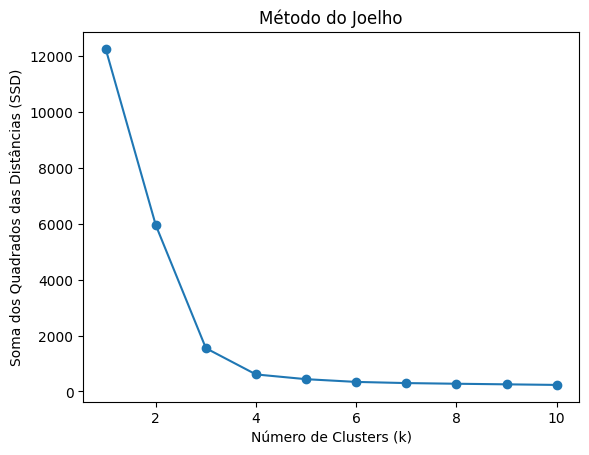

In [ ]:

# Criar um conjunto de dados de exemplo
X, y = make_blobs(n_samples=200, centers=6, random_state=42)

# Definir uma lista para armazenar as somas dos quadrados das distâncias
ssd = []

# Testar diferentes valores de k
for k in range(1, 11):
    # Criar uma instância do algoritmo de clustering (K-means)
    clustering = KMeans(n_clusters=k, random_state=42)
    clustering.fit(X)
    # Armazenar a soma dos quadrados das distâncias
    ssd.append(clustering.inertia_)

# Plotar a curva do método do joelho
plt.plot(range(1, 11), ssd, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Soma dos Quadrados das Distâncias (SSD)')
plt.title('Método do Joelho')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

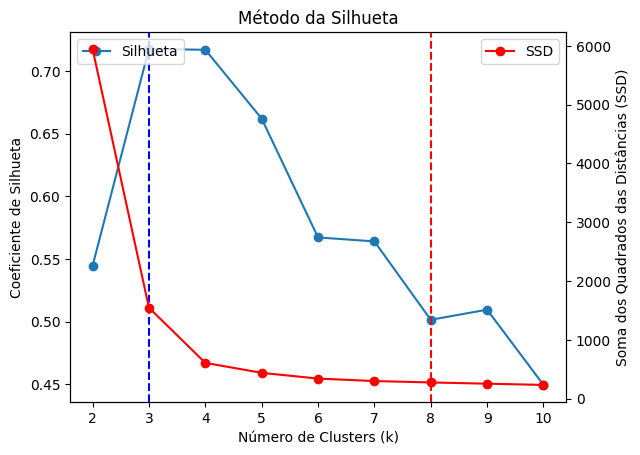

Melhor número de clusters baseado na Silhueta: 3
Coeficiente de Silhueta correspondente: 0.7175794379629798
Melhor número de clusters baseado no Método do Joelho: 8


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

X, y = make_blobs(n_samples=200, centers=6, random_state=42)

def evaluate_clusters(X, max_clusters):
    # Lista para armazenar os valores de silhueta
    silhouette_scores = []
    # Lista para armazenar as somas dos quadrados das distâncias
    ssd = []

    for k in range(2, max_clusters + 1):
        # Criar uma instância do algoritmo de clustering (K-means)
        clustering = KMeans(n_clusters=k, random_state=42)
        clustering.fit(X)

        # Calcular o coeficiente de silhueta médio
        silhouette_avg = silhouette_score(X, clustering.labels_)
        silhouette_scores.append(silhouette_avg)

        # Armazenar a soma dos quadrados das distâncias
        ssd.append(clustering.inertia_)

    # Plotar a curva de silhueta
    fig, ax1 = plt.subplots()
    ax1.plot(range(2, max_clusters + 1), silhouette_scores, marker='o', label='Silhueta')
    ax1.set_xlabel('Número de Clusters (k)')
    ax1.set_ylabel('Coeficiente de Silhueta')
    ax1.set_title('Método da Silhueta')

    # Plotar a curva do método do joelho
    ax2 = ax1.twinx()
    ax2.plot(range(2, max_clusters + 1), ssd, marker='o', color='r', label='SSD')
    ax2.set_ylabel('Soma dos Quadrados das Distâncias (SSD)')

    # Encontrar o ponto de máximo coeficiente de silhueta
    best_silhouette_idx = np.argmax(silhouette_scores) + 2
    best_silhouette = silhouette_scores[best_silhouette_idx - 2]

    # Encontrar o ponto de joelho na curva SSD
    diff = np.diff(ssd)
    best_knee_idx = np.argmax(diff) + 2

    # Plotar as linhas verticais para indicar os melhores pontos
    ax1.axvline(x=best_silhouette_idx, linestyle='--', color='b')
    ax2.axvline(x=best_knee_idx, linestyle='--', color='r')

    # Adicionar legendas
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')

    plt.show()

    return best_silhouette_idx, best_silhouette, best_knee_idx

# Exemplo de uso
 # Seus dados
max_clusters = 10  # Número máximo de clusters a serem avaliados

best_silhouette_idx, best_silhouette, best_knee_idx = evaluate_clusters(X, max_clusters)

print(f"Melhor número de clusters baseado na Silhueta: {best_silhouette_idx}")
print(f"Coeficiente de Silhueta correspondente: {best_silhouette}")
print(f"Melhor número de clusters baseado no Método do Joelho: {best_knee_idx}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

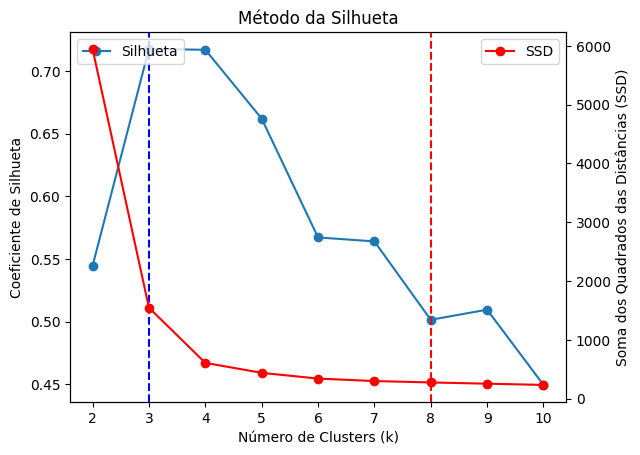

Melhor número de clusters baseado na Silhueta: 3
Coeficiente de Silhueta correspondente: 0.7175794379629798
Melhor número de clusters baseado no Método do Joelho: 8


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

X, y = make_blobs(n_samples=200, centers=6, random_state=42)

def evaluate_clusters(X, max_clusters):
    # Lista para armazenar os valores de silhueta
    silhouette_scores = []
    # Lista para armazenar as somas dos quadrados das distâncias
    ssd = []

    for k in range(2, max_clusters + 1):
        # Criar uma instância do algoritmo de clustering (K-means)
        clustering = KMeans(n_clusters=k, random_state=42)
        clustering.fit(X)

        # Calcular o coeficiente de silhueta médio
        silhouette_avg = silhouette_score(X, clustering.labels_)
        silhouette_scores.append(silhouette_avg)

        # Armazenar a soma dos quadrados das distâncias
        ssd.append(clustering.inertia_)

    # Plotar a curva de silhueta
    fig, ax1 = plt.subplots()
    ax1.plot(range(2, max_clusters + 1), silhouette_scores, marker='o', label='Silhueta')
    ax1.set_xlabel('Número de Clusters (k)')
    ax1.set_ylabel('Coeficiente de Silhueta')
    ax1.set_title('Método da Silhueta')

    # Plotar a curva do método do joelho
    ax2 = ax1.twinx()
    ax2.plot(range(2, max_clusters + 1), ssd, marker='o', color='r', label='SSD')
    ax2.set_ylabel('Soma dos Quadrados das Distâncias (SSD)')

    # Encontrar o ponto de máximo coeficiente de silhueta
    best_silhouette_idx = np.argmax(silhouette_scores) + 2
    best_silhouette = silhouette_scores[best_silhouette_idx - 2]

    # Encontrar o ponto de joelho na curva SSD
    diff = np.diff(ssd)
    best_knee_idx = np.argmax(diff) + 2

    # Plotar as linhas verticais para indicar os melhores pontos
    ax1.axvline(x=best_silhouette_idx, linestyle='--', color='b')
    ax2.axvline(x=best_knee_idx, linestyle='--', color='r')

    # Adicionar legendas
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')

    plt.show()

    return best_silhouette_idx, best_silhouette, best_knee_idx

# Exemplo de uso
 # Substitua ... pela sua matriz de dados
max_clusters = 10  # Número máximo de clusters a serem avaliados

best_silhouette_idx, best_silhouette, best_knee_idx = evaluate_clusters(X, max_clusters)

print(f"Melhor número de clusters baseado na Silhueta: {best_silhouette_idx}")
print(f"Coeficiente de Silhueta correspondente: {best_silhouette}")
print(f"Melhor número de clusters baseado no Método do Joelho: {best_knee_idx}")


# Batalha

In [ ]:
import pandas as pd

# DataFrame de exemplo
df = pd.DataFrame({'campo': ['pix parcelado', 'golpe pix', 'golpe whatsaap', 'golpe gerente', 'golpe_pix_parcelado']})

# Substituir campos de texto que contenham 'pix' por 'substituto'
df['campo'] = df['campo'].str.replace('.*pix.*', 'substituto', regex=True)

# Exibir o DataFrame resultante
print(df)

            campo
0      substituto
1      substituto
2  golpe whatsaap
3   golpe gerente
4      substituto


In [ ]:
# valores nulos dos campos substituir por zero
SELECT CAST(COALESCE(idade_str, '0') AS INT) AS idade, nome
FROM exemplo;

In [ ]:
# lidar com valores escritos como nulos
SELECT
  CASE WHEN idade_str = 'NULL' THEN NULL ELSE CAST(idade_str AS INT) END AS idade,
  nome
FROM exemplo;

In [ ]:
 TRY_CAST ou TRY_CONVERT

# Try Cast to int manual
CREATE FUNCTION try_cast_to_int AS 'org.apache.hadoop.hive.contrib.udf.example.TryCastToInt';

SELECT
  try_cast_to_int(idade_str) AS idade,
  nome
FROM exemplo;


# Lift


In [ ]:
import pandas as pd

# Exemplo de dados fictícios de propensão à compra (pontuação de propensão e se a compra ocorreu ou não)
data = {'Propensao': [0.8, 0.7, 0.9, 0.6, 0.3, 0.5, 0.2, 0.4, 0.1, 0.7],
        'Compra': [1, 1, 0, 0, 0, 1, 0, 1, 1, 0]}
df = pd.DataFrame(data)
# Classificar os dados pela pontuação de propensão em ordem decrescente
df = df.sort_values('Propensao', ascending=False)
df

,Propensao,Compra
2,0.9,0
0,0.8,1
1,0.7,1
9,0.7,0
3,0.6,0
5,0.5,1
7,0.4,1
4,0.3,0
6,0.2,0
8,0.1,1


In [ ]:
# Calcular o decil para cada linha
df['Decil'] = pd.qcut(df['Propensao'], q=10, labels=False)
df

,Propensao,Compra,Decil
2,0.9,0,9
0,0.8,1,8
1,0.7,1,6
9,0.7,0,6
3,0.6,0,5
5,0.5,1,4
7,0.4,1,3
4,0.3,0,2
6,0.2,0,1
8,0.1,1,0


In [ ]:
# Calcular a taxa de conversão observada em cada decil
taxa_conversao = df.groupby('Decil')['Compra'].mean()
taxa_conversao

Decil
0    1.0
1    0.0
2    0.0
3    1.0
4    1.0
5    0.0
6    0.5
8    1.0
9    0.0
Name: Compra, dtype: float64

In [ ]:
# Calcular a taxa de conversão média global
taxa_conversao_global = df['Compra'].mean()
taxa_conversao_global
# Calcular o lift para cada decil
lift = taxa_conversao / taxa_conversao_global
lift

Decil
0    2.0
1    0.0
2    0.0
3    2.0
4    2.0
5    0.0
6    1.0
8    2.0
9    0.0
Name: Compra, dtype: float64

In [ ]:
taxa_conversao_glob = 446/345712
taxa_conversao_glob
0.00170085/taxa_conversao_glob

1.3183951910313902

In [ ]:
# Imprimir a tabela de decil com as taxas de conversão e o lift
tabela_decil = pd.concat([taxa_conversao, lift], axis=1)
tabela_decil.columns = ['Taxa de Conversao', 'Lift']
print(tabela_decil)

       Taxa de Conversao  Lift
Decil                         
0                    1.0   2.0
1                    0.0   0.0
2                    0.0   0.0
3                    1.0   2.0
4                    1.0   2.0
5                    0.0   0.0
6                    0.5   1.0
8                    1.0   2.0
9                    0.0   0.0


# Criação de Graficos

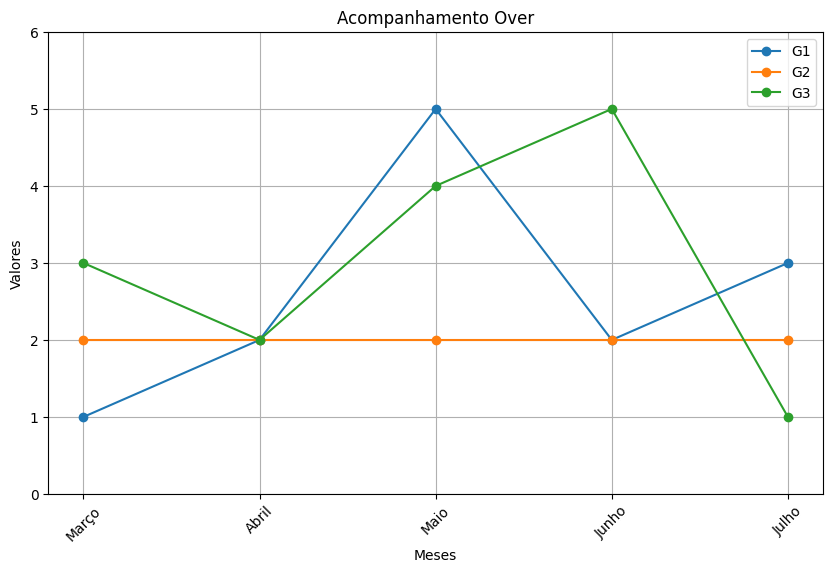

In [ ]:
import matplotlib.pyplot as plt

# Dados
meses = ['Março', 'Abril', 'Maio', 'Junho', 'Julho']
valores_G1 = [1, 2, 5, 2, 3]
valores_G2 = [2, 2, 2, 2, 2]
valores_G3 = [3, 2, 4, 5, 1]

# Criar o gráfico
plt.figure(figsize=(10, 6))
plt.plot(meses, valores_G1, 'o-', label='G1')
plt.plot(meses, valores_G2, 'o-', label='G2')
plt.plot(meses, valores_G3, 'o-', label='G3')
plt.xlabel('Meses')
plt.ylabel('Valores')
plt.title('Acompanhamento Over')
plt.legend()
plt.xticks(rotation=45)  # Rotação dos rótulos do eixo x
plt.ylim(0, 6)  # Ajuste da escala do eixo y para [0, 6]
plt.grid(True)
plt.show()

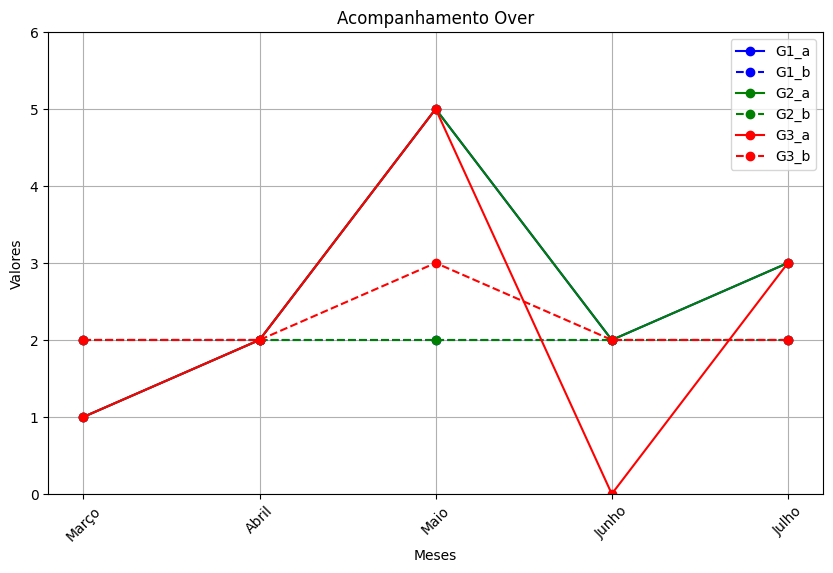

In [ ]:
import matplotlib.pyplot as plt

# Dados
meses = ['Março', 'Abril', 'Maio', 'Junho', 'Julho']
valores_G1_a = [1, 2, 5, 2, 3]
valores_G1_b = [2, 2, 2, 2, 2]
valores_G2_a = [1, 2, 5, 2, 3]
valores_G2_b = [2, 2, 2, 2, 2]
valores_G3_a = [1, 2, 5, 0, 3]
valores_G3_b = [2, 2, 3, 2, 2]

# Criar o gráfico
plt.figure(figsize=(10, 6))

# Linhas para G1
plt.plot(meses, valores_G1_a, 'o-', label='G1_a', color='blue')
plt.plot(meses, valores_G1_b, 'o--', label='G1_b', color='blue')

# Linhas para G2
plt.plot(meses, valores_G2_a, 'o-', label='G2_a', color='green')
plt.plot(meses, valores_G2_b, 'o--', label='G2_b', color='green')

# Linhas para G3
plt.plot(meses, valores_G3_a, 'o-', label='G3_a', color='red')
plt.plot(meses, valores_G3_b, 'o--', label='G3_b', color='red')

plt.xlabel('Meses')
plt.ylabel('Valores')
plt.title('Acompanhamento Over')
plt.legend()
plt.xticks(rotation=45)
plt.ylim(0, 6)
plt.grid(True)
plt.show()


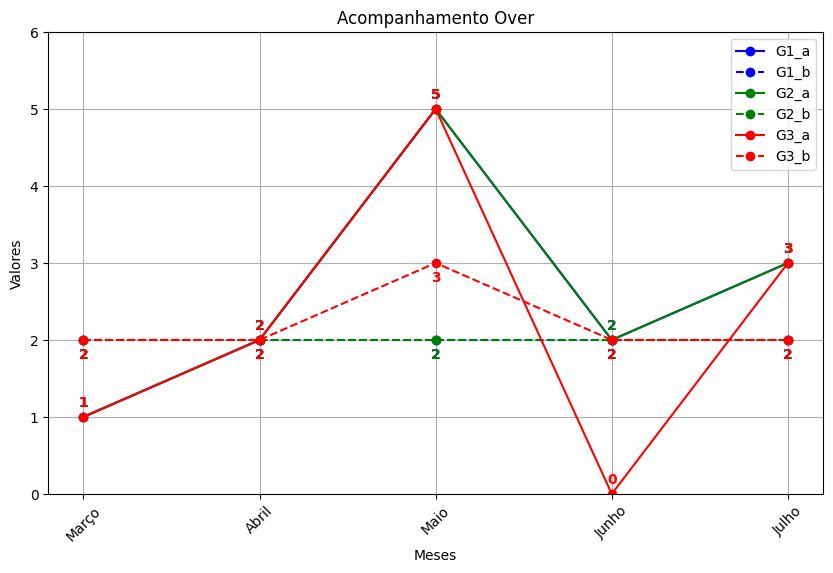

In [ ]:
import matplotlib.pyplot as plt

# Dados
meses = ['Março', 'Abril', 'Maio', 'Junho', 'Julho']
valores_G1_a = [1, 2, 5, 2, 3]
valores_G1_b = [2, 2, 2, 2, 2]
valores_G2_a = [1, 2, 5, 2, 3]
valores_G2_b = [2, 2, 2, 2, 2]
valores_G3_a = [1, 2, 5, 0, 3]
valores_G3_b = [2, 2, 3, 2, 2]

# Criar o gráfico
plt.figure(figsize=(10, 6))

# Linhas para G1
plt.plot(meses, valores_G1_a, 'o-', label='G1_a', color='blue')
plt.plot(meses, valores_G1_b, 'o--', label='G1_b', color='blue')

for i, v in enumerate(valores_G1_a):
    plt.text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=10, fontweight='bold', color='blue')
for i, v in enumerate(valores_G1_b):
    plt.text(i, v - 0.1, str(v), ha='center', va='top', fontsize=10, fontweight='bold', color='blue')

# Linhas para G2
plt.plot(meses, valores_G2_a, 'o-', label='G2_a', color='green')
plt.plot(meses, valores_G2_b, 'o--', label='G2_b', color='green')

for i, v in enumerate(valores_G2_a):
    plt.text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=10, fontweight='bold', color='green')
for i, v in enumerate(valores_G2_b):
    plt.text(i, v - 0.1, str(v), ha='center', va='top', fontsize=10, fontweight='bold', color='green')

# Linhas para G3
plt.plot(meses, valores_G3_a, 'o-', label='G3_a', color='red')
plt.plot(meses, valores_G3_b, 'o--', label='G3_b', color='red')

for i, v in enumerate(valores_G3_a):
    plt.text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=10, fontweight='bold', color='red')
for i, v in enumerate(valores_G3_b):
    plt.text(i, v - 0.1, str(v), ha='center', va='top', fontsize=10, fontweight='bold', color='red')

plt.xlabel('Meses')
plt.ylabel('Valores')
plt.title('Acompanhamento Over')
plt.legend()
plt.xticks(rotation=45)
plt.ylim(0, 6)
plt.grid(True)
plt.show()


# KS

Estatística KS: 0.047629738918468154
Valor p associado ao KS: 0.6003128499096302


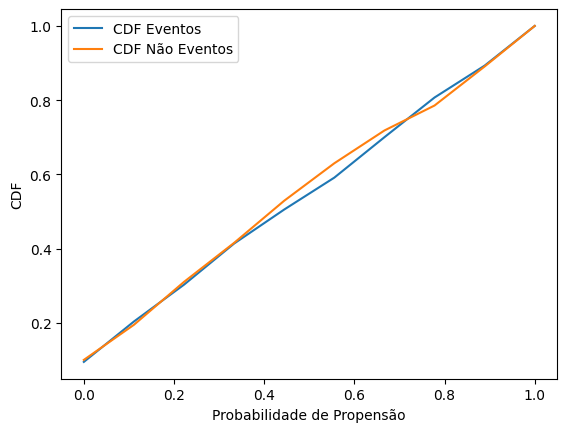

In [ ]:
import numpy as np
from scipy.stats import ks_2samp

# Simulação de previsões contínuas do modelo (probabilidades)
np.random.seed(0)
predictions = np.random.rand(1000)  # Substitua por suas previsões reais

# Simulação de rótulos reais (0: não ocorreu, 1: ocorreu)
true_labels = np.random.randint(2, size=1000)  # Substitua pelos rótulos reais

# Função para calcular o KS
def calculate_ks(predictions, true_labels):
    # Dividindo as previsões em eventos e não eventos
    events = predictions[true_labels == 1]
    non_events = predictions[true_labels == 0]

    # Calculando as CDFs
    cdf_events = np.cumsum(np.histogram(events, bins=np.linspace(0, 1, 11))[0]) / len(events)
    cdf_non_events = np.cumsum(np.histogram(non_events, bins=np.linspace(0, 1, 11))[0]) / len(non_events)

    # Calculando a estatística KS
    ks_statistic, ks_p_value = ks_2samp(events, non_events)

    return cdf_events, cdf_non_events, ks_statistic, ks_p_value

# Calculando o KS
cdf_events, cdf_non_events, ks_statistic, ks_p_value = calculate_ks(predictions, true_labels)

# Exibindo os resultados
print("Estatística KS:", ks_statistic)
print("Valor p associado ao KS:", ks_p_value)

# Plotando as CDFs
import matplotlib.pyplot as plt

x = np.linspace(0, 1, len(cdf_events))
plt.plot(x, cdf_events, label='CDF Eventos')
plt.plot(x, cdf_non_events, label='CDF Não Eventos')
plt.xlabel('Probabilidade de Propensão')
plt.ylabel('CDF')
plt.legend()
plt.show()


In [ ]:
import numpy as np
from scipy.stats import ks_2samp

# Vamos simular duas classes desbalanceadas
np.random.seed(0)
class_0 = np.random.normal(0, 1, 1000)  # Classe majoritária
class_1 = np.random.normal(2, 1, 100)   # Classe minoritária

# Reamostragem bootstrap da classe majoritária
n_bootstrap_samples = 100  # Número de amostras para a reamostragem bootstrap
bootstrap_statistics = []

for _ in range(n_bootstrap_samples):
    # Amostragem com reposição da classe majoritária
    bootstrap_sample = np.random.choice(class_0, size=len(class_0), replace=True)

    # Calcula o KS entre a amostra bootstrap da classe majoritária e a classe minoritária
    ks_statistic, _ = ks_2samp(bootstrap_sample, class_1)
    bootstrap_statistics.append(ks_statistic)

# Calcula o KS para a classe original (sem bootstrap)
ks_statistic, ks_p_value = ks_2samp(class_0, class_1)

# Calcula o percentil 95 das estatísticas bootstrap
ks_bootstrap_percentile_95 = np.percentile(bootstrap_statistics, 95)

print("Estatística KS original:", ks_statistic)
print("P-value associado ao KS original:", ks_p_value)
print("Percentil 95 das estatísticas bootstrap:", ks_bootstrap_percentile_95)


Estatística KS original: 0.75
P-value associado ao KS original: 2.8484777963932185e-52
Percentil 95 das estatísticas bootstrap: 0.771


In [ ]:
import numpy as np
from scipy.stats import ks_2samp

# Vamos simular duas classes desbalanceadas
np.random.seed(0)
class_0 = np.random.normal(0, 1, 1000)  # Classe majoritária
class_1 = np.random.normal(2, 1, 100)   # Classe minoritária

# Reamostragem bootstrap para ambas as classes
n_bootstrap_samples = 100  # Número de amostras para a reamostragem bootstrap
bootstrap_statistics = []

for _ in range(n_bootstrap_samples):
    # Amostragem com reposição para ambas as classes
    bootstrap_sample_0 = np.random.choice(class_0, size=200, replace=True)
    bootstrap_sample_1 = np.random.choice(class_1, size=200, replace=True)

    # Calcula o KS entre as amostras bootstrap das duas classes
    ks_statistic, _ = ks_2samp(bootstrap_sample_0, bootstrap_sample_1)
    bootstrap_statistics.append(ks_statistic)

# Calcula o KS para as classes originais (sem bootstrap)
ks_statistic, ks_p_value = ks_2samp(class_0, class_1)

# Calcula o percentil 95 das estatísticas bootstrap
ks_bootstrap_percentile_95 = np.percentile(bootstrap_statistics, 95)

print("Estatística KS original:", ks_statistic)
print("P-value associado ao KS original:", ks_p_value)
print("Percentil 95 das estatísticas bootstrap:", ks_bootstrap_percentile_95)


Estatística KS original: 0.75
P-value associado ao KS original: 2.8484777963932185e-52
Percentil 95 das estatísticas bootstrap: 0.805


In [ ]:
np.mean(bootstrap_statistics)

0.7565

# Legendas de cores

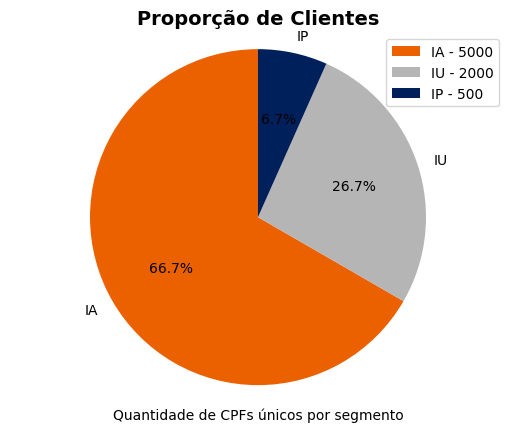

In [ ]:
import matplotlib.pyplot as plt

# Dados
valores = [5000, 2000, 500]
legendas = ['IA', 'IU', 'IP']
cores = ['#EB6100', '#B5B5B5', '#00205B']

# Criar o gráfico de pizza
fig, ax = plt.subplots()
ax.pie(valores, labels=legendas, colors=cores, autopct='%1.1f%%', startangle=90)
ax.set_title('Proporção de Clientes', fontsize=14, fontweight='bold')
ax.set_xlabel('Quantidade de CPFs únicos por segmento')

# Mostrar a legenda das porcentagens
plt.legend(loc='upper right', labels=[f'{l} - {v}' for l, v in zip(legendas, valores)])

plt.axis('equal')  # Mantém o gráfico circular

# Exibir o gráfico
plt.show()


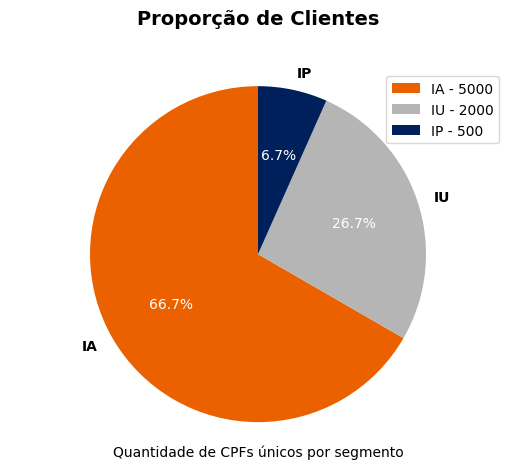

In [ ]:
import matplotlib.pyplot as plt

# Dados
valores = [5000, 2000, 500]
legendas = ['IA', 'IU', 'IP']
cores = ['#EB6100', '#B5B5B5', '#00205B']

# Criar o gráfico de pizza
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(valores, labels=legendas, colors=cores, autopct='%1.1f%%', startangle=90)

# Modificações de formatação
ax.set_title('Proporção de Clientes', fontsize=14, fontweight='bold', y=1.1)  # Move o título para cima
ax.set_xlabel('Quantidade de CPFs únicos por segmento', y=0.9)  # Move o subtítulo abaixo do título

# Modificações nas legendas
for i, legend in enumerate(legendas):
    # Coloca as legendas IA, IU, IP em negrito
    texts[i].set_fontweight('bold')

    # Muda a cor do texto das porcentagens para branco
    autotexts[i].set_color('white')

# Mostrar a legenda das porcentagens
plt.legend(wedges, [f'{l} - {v}' for l, v in zip(legendas, valores)], loc="upper right")

plt.axis('equal')  # Mantém o gráfico circular

# Exibir o gráfico
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go

# Dados
valores = [5000, 2000, 500]
legendas = ['IA', 'IU', 'IP']
cores = ['#EB6100', '#B5B5B5', '#00205B']

# Criar o gráfico de pizza com Plotly
fig = go.Figure(data=[go.Pie(labels=legendas, values=valores,
                             textinfo='percent+label', hole=0.3,
                             marker=dict(colors=cores, line=dict(color='white', width=2)))])

# Layout
fig.update_layout(title='Proporção de Clientes',
                  title_x=0.5,  # Centraliza o título
                  annotations=[dict(text='Quantidade de CPFs únicos por segmento', showarrow=False,
                                    x=0.5, y=-0.15)],  # Subtítulo
                  margin=dict(t=100, b=10, l=10, r=10))  # Ajusta margens

# Exibir o gráfico
fig.show()


In [ ]:
import numpy as np

# Exemplo de salários (substitua com seus dados reais)
salarios_exemplo = np.random.randint(500, 71000, 1000)

# Calcule os percentis
percentis = np.percentile(salarios_exemplo, [0, 25, 50, 75, 100])

# Print dos percentis
print("Percentis:")
for i, perc in enumerate(percentis):
    print(f"{i*25}%: {perc}")
    print(f"{i*25}%: {(perc//100)*100}")
# Vamos usar esses percentis para criar as faixas
faixas_salariais = percentis

# Agora, vamos dividir os salários em faixas com base nos percentis
faixas_salario = np.digitize(salarios_exemplo, bins=faixas_salariais, right=True)

# Visualize os resultados
for i in range(len(percentis) - 1):
    print(f'Faixa {percentis[i]}-{percentis[i+1]} percentile: {np.sum(faixas_salario == i)} salários')


Percentis:
0%: 535.0
0%: 500.0
25%: 19099.25
25%: 19000.0
50%: 36976.0
50%: 36900.0
75%: 54373.0
75%: 54300.0
100%: 70938.0
100%: 70900.0
Faixa 535.0-19099.25 percentile: 1 salários
Faixa 19099.25-36976.0 percentile: 249 salários
Faixa 36976.0-54373.0 percentile: 250 salários
Faixa 54373.0-70938.0 percentile: 250 salários


In [ ]:
import pandas as pd
import numpy as np

# Definindo o número de linhas
n = 1000

# Proporções das categorias
prop_seg = {'IA': 0.7, 'IU': 0.2, 'IP': 0.1}
prop_momento = {'asce': 0.4, 'esta': 0.4, 'desc': 0.2}

# Gerando os dados de acordo com as proporções
seg = np.random.choice(list(prop_seg.keys()), size=n, p=list(prop_seg.values()))
renda = np.random.randint(300, 70001, size=n)
idade = np.random.randint(18, 99, size=n)
mob = np.random.randint(1, 99, size=n)
profissao = np.random.choice(['engenheiro', 'professor', 'médico', 'advogado', 'estudante'], size=n)
estado = np.random.choice(['sp ', 'rj', 'mg', 'pr', 'sc'], size=n)
momento = np.random.choice(list(prop_momento.keys()), size=n, p=list(prop_momento.values()))
emprestimo = np.random.randint(80, 70001, size=n)

# Criando o DataFrame
df = pd.DataFrame({
    'seg': seg,
    'renda': renda,
    'idade': idade,
    'profissao': profissao,
    'momento': momento,
    'emprestimo': emprestimo,
    'mob': mob,
    'estado': estado
})

# Visualizando as primeiras linhas
print(df.head())


  seg  renda  idade   profissao momento  emprestimo  mob estado
0  IA   6946     91   estudante    asce       27976   34     sc
1  IA  24934     86    advogado    desc       20272   44    sp 
2  IA  30588     28  engenheiro    asce       68054   32     mg
3  IA  64036     74  engenheiro    asce       16771    7     rj
4  IA  64614     80      médico    esta       28232   11     rj


In [ ]:
df

,seg,renda,idade,profissao,momento,emprestimo
0,IP,1053,38,engenheiro,esta,35162
1,IP,30935,97,advogado,desc,18876
2,IA,60859,75,professor,asce,63961
3,IA,19468,65,engenheiro,asce,9316
4,IA,66932,53,estudante,asce,66438
...,...,...,...,...,...,...
995,IA,69303,28,médico,esta,9408
996,IU,25294,20,médico,asce,59664
997,IP,34955,35,médico,esta,35186
998,IP,37734,47,advogado,esta,58648


# Localidades

Text(0, 0.5, 'Count')

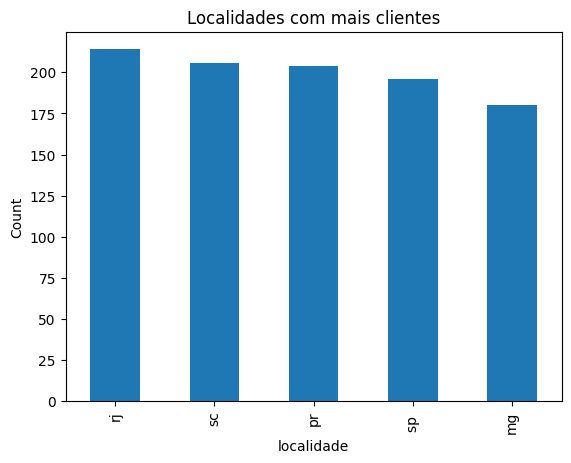

In [ ]:
ax = df['estado'].value_counts() \
    .head(10) \
    .plot(kind='bar', title='Localidades com mais clientes')
ax.set_xlabel('localidade')
ax.set_ylabel('Count')

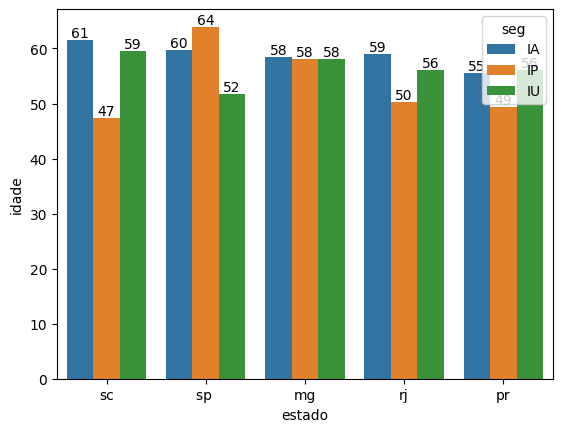

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.barplot(df, x="estado", y="idade", hue='seg', estimator="mean", errorbar=None)
for container in ax.containers:
    ax.bar_label(container, fmt='%.f', fontsize=10)

plt.show()

# Mesmo para centros urbanos

# Valor emprestimo

Text(0.5, 0, 'valor')

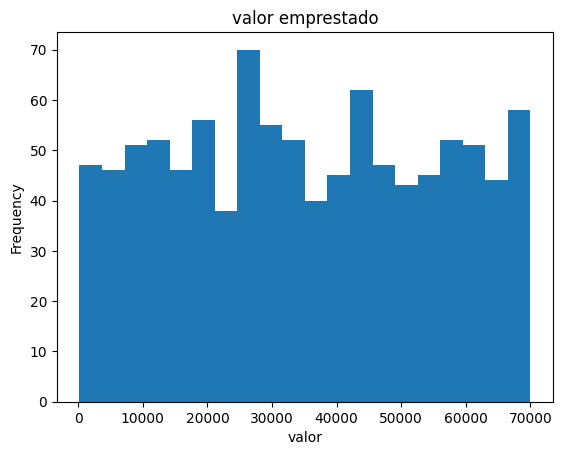

In [ ]:
ax = df['emprestimo'].plot(kind='hist',
                          bins=20,
                          title='valor emprestado')
ax.set_xlabel('valor')

Text(0.5, 0, 'valor')

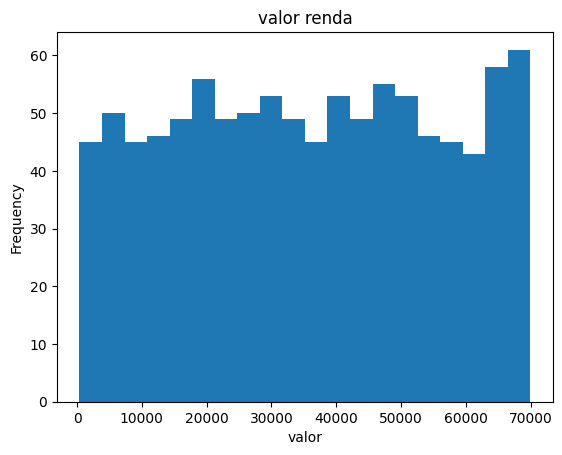

In [ ]:
ax = df['renda'].plot(kind='hist',
                          bins=20,
                          title='valor renda')
ax.set_xlabel('valor')

# Pairplot

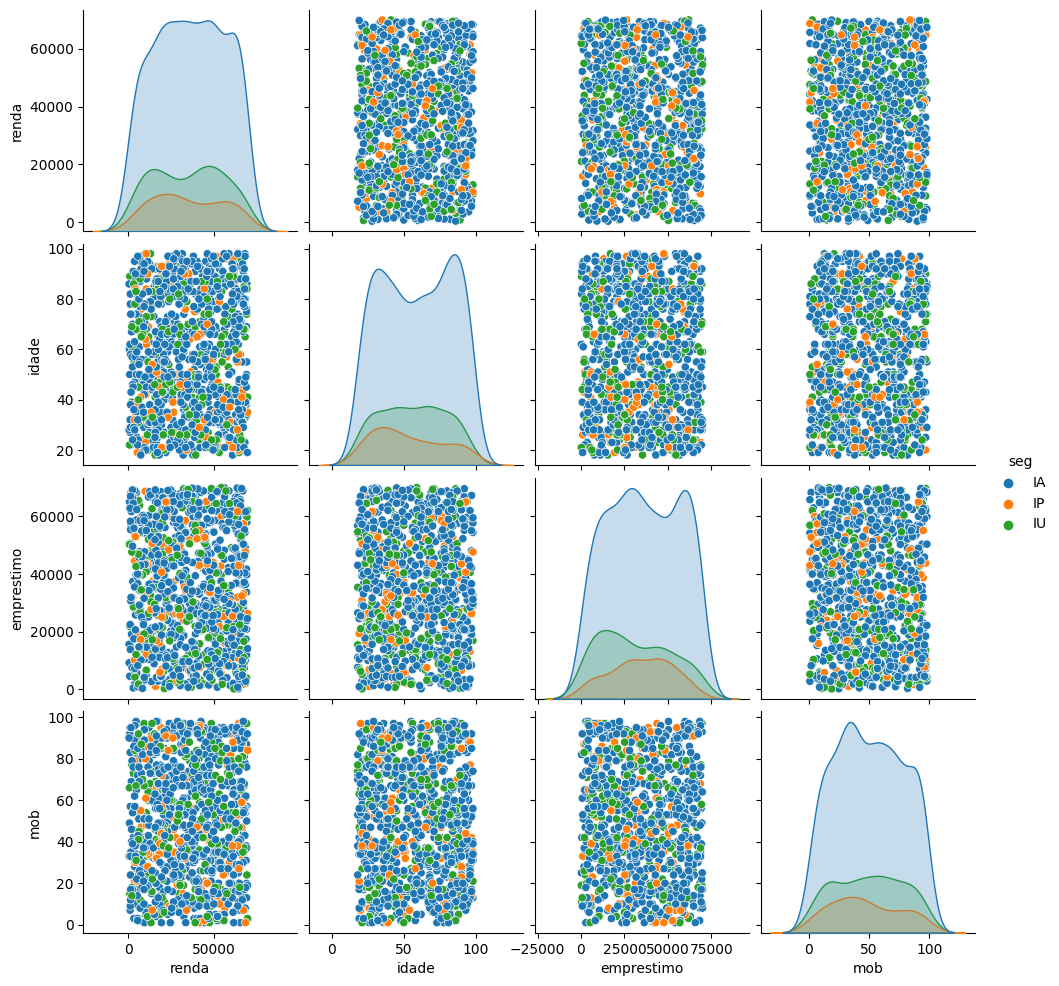

In [ ]:
sns.pairplot(df,
             vars=['renda','idade',
                   'emprestimo','mob'],
            hue='seg')
plt.show()

In [ ]:
df_aux = df.copy()
df = pd.get_dummies(df,columns=['momento'], dummy_na=True)
df['momento'] = df_aux['momento']
df

,seg,renda,idade,profissao,emprestimo,mob,estado,momento_asce,momento_desc,momento_esta,momento_nan,momento
0,IA,6946,91,estudante,27976,34,sc,1,0,0,0,asce
1,IA,24934,86,advogado,20272,44,sp,0,1,0,0,desc
2,IA,30588,28,engenheiro,68054,32,mg,1,0,0,0,asce
3,IA,64036,74,engenheiro,16771,7,rj,1,0,0,0,asce
4,IA,64614,80,médico,28232,11,rj,0,0,1,0,esta
...,...,...,...,...,...,...,...,...,...,...,...,...
995,IA,23202,49,estudante,69017,76,sc,0,1,0,0,desc
996,IU,54028,62,professor,17600,70,mg,0,1,0,0,desc
997,IA,46363,33,engenheiro,44601,53,rj,1,0,0,0,asce
998,IA,37503,71,professor,34115,45,sc,0,0,1,0,esta


In [ ]:
df.columns

Index(['seg', 'renda', 'idade', 'profissao', 'emprestimo', 'mob', 'estado',
       'momento_asce', 'momento_desc', 'momento_esta', 'momento_nan',
       'momento'],
      dtype='object')

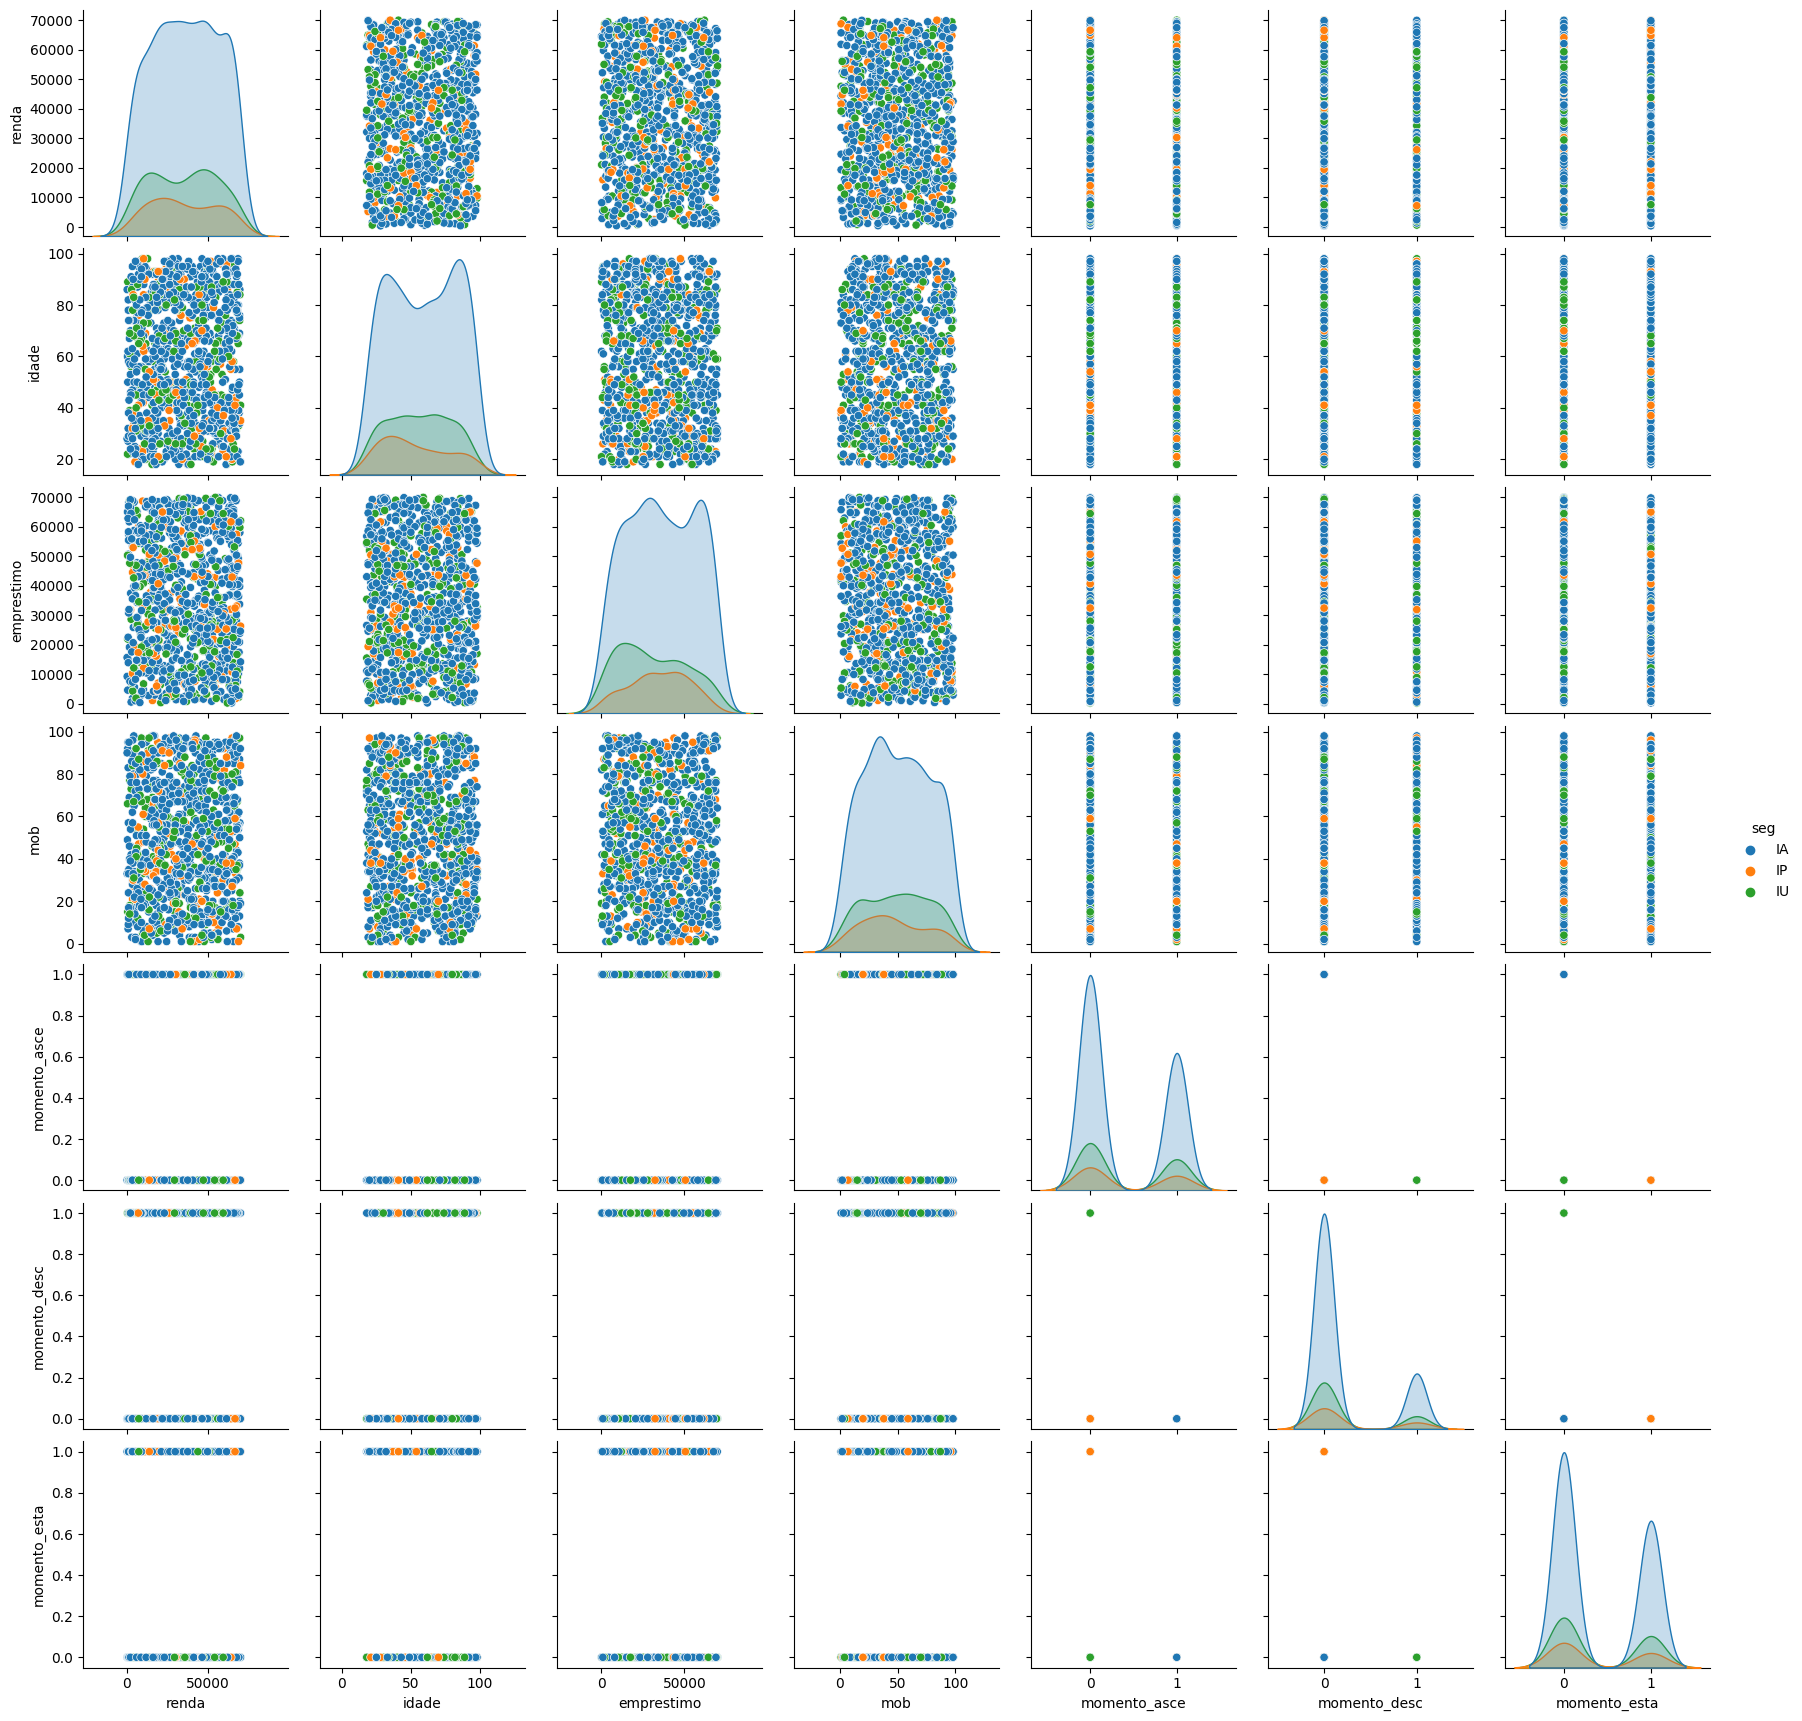

In [ ]:
sns.pairplot(df,
             vars=['renda','idade',
                   'emprestimo','mob','momento_asce', 'momento_desc', 'momento_esta'],
            hue='seg')
plt.show()

In [ ]:
df

,seg,renda,idade,profissao,momento,emprestimo,mob,estado
0,IA,6946,91,estudante,asce,27976,34,sc
1,IA,24934,86,advogado,desc,20272,44,sp
2,IA,30588,28,engenheiro,asce,68054,32,mg
3,IA,64036,74,engenheiro,asce,16771,7,rj
4,IA,64614,80,médico,esta,28232,11,rj
...,...,...,...,...,...,...,...,...
995,IA,23202,49,estudante,desc,69017,76,sc
996,IU,54028,62,professor,desc,17600,70,mg
997,IA,46363,33,engenheiro,asce,44601,53,rj
998,IA,37503,71,professor,esta,34115,45,sc


# Outliers

In [ ]:
import pandas as pd

def replace_outliers_percentile(df, column, percentile=95):
    """
    Substitui os outliers de uma coluna por um percentil específico.

    Parâmetros:
    df (pd.DataFrame): O DataFrame.
    column (str): O nome da coluna que contém os outliers.
    percentile (float): O percentil para substituição (0-100).

    Retorna:
    pd.DataFrame: O DataFrame com os outliers substituídos.
    """
    # Calcula o percentil especificado
    replacement_value = df[column].quantile(percentile / 100)

    # Substitui os outliers pelo percentil
    df[column] = df[column].apply(lambda x: replacement_value if x > replacement_value else x)

    return df

# Exemplo de uso
# Suponha que df seja o seu DataFrame
# Substitui os outliers na coluna 'renda' pelo percentil 95%
df = replace_outliers_percentile(df, 'renda', percentile=95)
# Substitui os outliers na coluna 'emprestimo' pelo percentil 90%
df = replace_outliers_percentile(df, 'emprestimo', percentile=90)


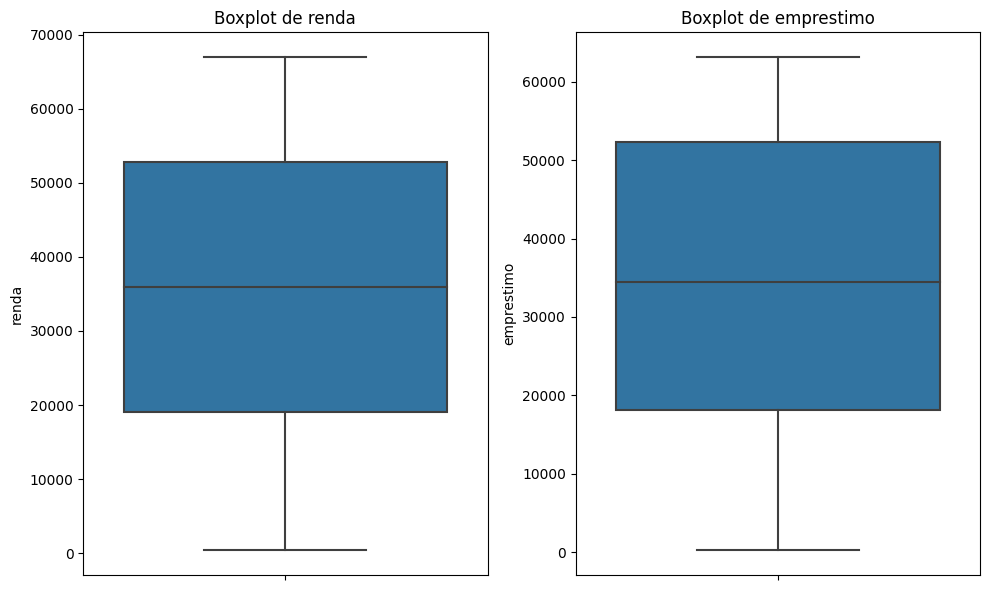

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Supondo que você tenha um DataFrame chamado 'df' com as colunas 'renda' e 'emprestimo'
# e que você já aplicou a função 'replace_outliers_percentile' para substituir os outliers.

# Lista das colunas a serem plotadas
colunas_alvo = ['renda', 'emprestimo']

# Configuração do tamanho do gráfico
plt.figure(figsize=(10, 6))

# Loop para criar os boxplots
for i, coluna in enumerate(colunas_alvo, 1):
    plt.subplot(1, len(colunas_alvo), i)
    sns.boxplot(y=df[coluna])
    plt.title(f'Boxplot de {coluna}')

plt.tight_layout()
plt.show()


#Regex

In [ ]:
import re

# Sua string de exemplo
texto = """Bom dia amauri, tenho informações importantes.
Prezado, seguem as informações do dia
preço da cana 20
preço do cacau 50
REGRAS GERAIS
Compre agora ou cale-se para sempre.
Atenciosamente"""

# Define as sentenças iniciais e finais
sentenca_inicial = "Prezado, seguem as informações"
sentenca_final = "REGRAS GERAIS"

# Constrói o padrão da regex
padrao = re.compile(fr'{re.escape(sentenca_inicial)}(.*?){re.escape(sentenca_final)}', re.DOTALL)

# Procura por correspondências na string
correspondencias = padrao.search(texto)

# Exibe o resultado
if correspondencias:
    resultado = correspondencias.group(1).strip()
    print(resultado)
else:
    print("Nenhuma correspondência encontrada.")
